看DNS快被各种servers搞晕了, 什么root server, name server (NS), DNS server, 真的受不了了, 这都是啥, 怎么一会叫这个一会叫那个???

当然首先要知道, 不管是什么server, 他们肯定存的是url到ip地址的map,

## 1. Root Server & Name Server
----

When you enter a website address into your browsers address bar, a DNS server goes to work to find the address that you want to visit. It does this by sending a DNS query to several servers, each of which translates a different part of the domain name you entered. The different servers queried are:

- A DNS Resolver: Receives the request to resolve the domain name with the IP address. This server does the grunt work in figuring out where the site you want to go actually resides on the internet.

- A Root Server: The root server receives the first request, and returns a result to let the DNS resolver know what the address of the Top Level Domain (TLD) server that stores the information about the site. A top level domain is the equivalent of the `.com` or `.net` portion of the domain name you entered into the address bar.

- A TLD Server: The DNS resolver then queries this server, which will return the **Authoritative Name Server** where the site is actually returned.

- An Authoritative Name Server: Finally, the DNS resolver queries this server to learn the actual IP address of the website you're trying to deliver.

好家伙, 原来他们都是DNS server, 只不过是存储的是不同级别的域名信息, 这里有两个角色, 一个是DNS Resolver一个是DNS Server. DNS Resolver收到一个查询url(`www.example.com`)ip地址的请求, 然后它就最先去请求Root Server查询TLD server的地址(就是com), 

你可能会想root server的ip地址在哪查呢? 因为DNS Resolver拿到请求的第一步就是向root server请求下一级也就是TLD server的ip地址. 因为一般root server就那几个, root server的ip地址DNS Resolver就知道, 不用查, 所以看看root server都是什么:

> The 13 DNS root nameservers are known to every recursive resolver, and they are the first stop in a recursive resolver’s quest for DNS records. [DNS server types](https://www.cloudflare.com/learning/dns/dns-server-types/)

The **authoritative name servers** that serve the DNS root zone, commonly known as the “root servers”, are a network of hundreds of servers in many countries around the world. They are configured in the DNS root zone as 13 named authorities, as follows. 看到这句话才发现, 原来不管是root server还是TLD server其实都是name server, 只不过用了不同的叫法方便区分. 

这些就是Root Server了, 他们存的是TLD Server的ip地址哦,

```shell
a.root-servers.net	198.41.0.4, 2001:503:ba3e::2:30	Verisign, Inc.
b.root-servers.net	199.9.14.201, 2001:500:200::b	University of Southern California,
Information Sciences Institute
c.root-servers.net	192.33.4.12, 2001:500:2::c	Cogent Communications
d.root-servers.net	199.7.91.13, 2001:500:2d::d	University of Maryland
e.root-servers.net	192.203.230.10, 2001:500:a8::e	NASA (Ames Research Center)
f.root-servers.net	192.5.5.241, 2001:500:2f::f	Internet Systems Consortium, Inc.
g.root-servers.net	192.112.36.4, 2001:500:12::d0d	US Department of Defense (NIC)
h.root-servers.net	198.97.190.53, 2001:500:1::53	US Army (Research Lab)
i.root-servers.net	192.36.148.17, 2001:7fe::53	Netnod
j.root-servers.net	192.58.128.30, 2001:503:c27::2:30	Verisign, Inc.
k.root-servers.net	193.0.14.129, 2001:7fd::1	RIPE NCC
l.root-servers.net	199.7.83.42, 2001:500:9f::42	ICANN
m.root-servers.net	202.12.27.33, 2001:dc3::35	WIDE Project
```

然后我们的域名可以设置自己的NameServer(即DNS Server), 也就是指定把该域名的`A` Record存在哪个DNS Server, 当然别忘了把VPS的ip绑定到我们的域名其实就是给域名添加个`A` Record的过程, 具体怎么添加, 你可以在上一篇文章[004 DNS Records](1)里查看,

----

现在我们理一下之前的概念, 

A **DNS record** is a database record used to map a URL to an IP address. DNS records are stored in **DNS servers** and work to help users connect their websites to the outside world. 

所以记住两个东西DNS Records是存储在DNS Server上的, 而DNS Server又叫Name Server. DNS Server(Name Server)有很多种, 比如Root Server(Root Name Server)就是用来存储domain name为`.com`, `.net`, `.blog`这种顶级域名的Name Server(这种DNS Server又叫TLD Server)的**ip地址**, 而TLDs Server存储的是次级的Domain Name的Name Server(这种Name Server又叫Authoritative Name Servers)的**ip地址**, 而最后终于, Authoritative Name Servers存储着我们要查询的网站的ip地址, 

所以以下这些名词终于理清了:

- DNS Server存的是DNS Records
- DNS Server = Name Server
- Name Server的分类:
    1. Root Servers = Root Name Servers: 存储着TLD Servers的ip地址
    2. TLD Servers = TLD Name Servers: 存储着Authoritative Name Servers的ip地址
    3. Authoritative Name Servers: 存储着example.com的ip地址

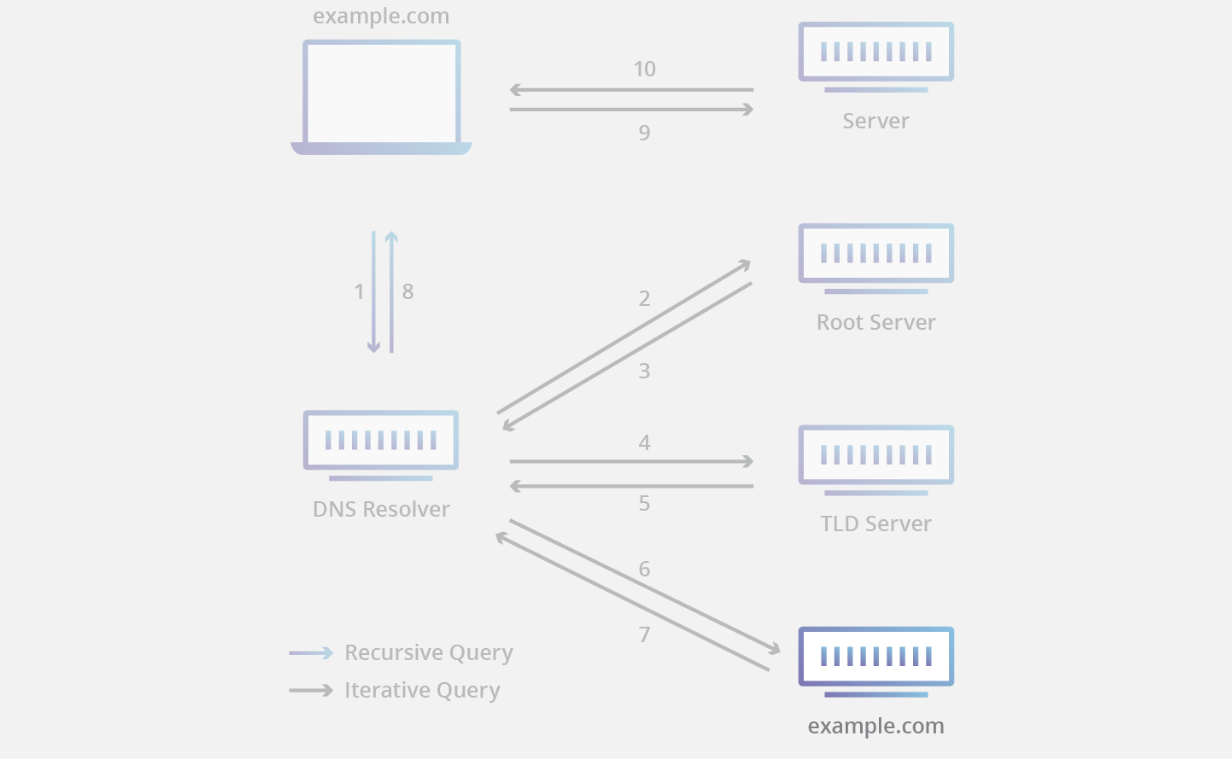

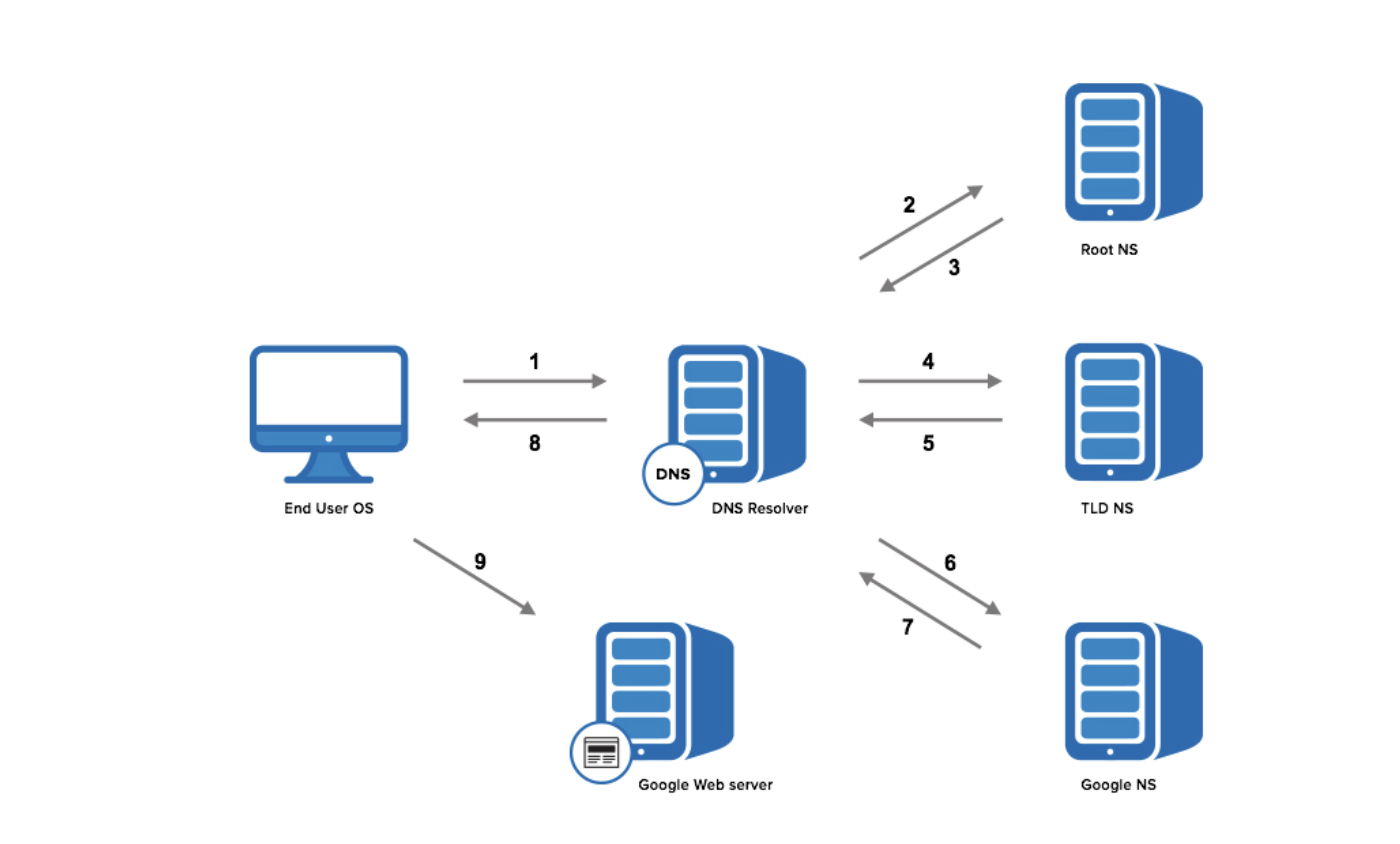

## 2. 实例分析
---

为了方便看, 我删除了一些输出的内容, 

```zsh
dig +trace shaowenzhu.top

; <<>> DiG 9.10.6 <<>> +trace shaowenzhu.top
;; global options: +cmd
.			383200	IN	NS	h.root-servers.net.
.			383200	IN	NS	b.root-servers.net.
.			383200	IN	NS	k.root-servers.net.
.			383200	IN	NS	m.root-servers.net.
.			383200	IN	NS	c.root-servers.net.
.			383200	IN	NS	a.root-servers.net.
.			383200	IN	NS	f.root-servers.net.
.			383200	IN	NS	j.root-servers.net.
.			383200	IN	NS	d.root-servers.net.
.			383200	IN	NS	i.root-servers.net.
.			383200	IN	NS	g.root-servers.net.
.			383200	IN	NS	e.root-servers.net.
;; Received 1097 bytes from 192.168.2.1#53(192.168.2.1) in 13 ms

top.			172800	IN	NS	a.zdnscloud.com.
top.			172800	IN	NS	b.zdnscloud.com.
top.			172800	IN	NS	c.zdnscloud.com.
top.			172800	IN	NS	d.zdnscloud.com.
top.			172800	IN	NS	f.zdnscloud.com.
top.			172800	IN	NS	g.zdnscloud.com.
top.			172800	IN	NS	i.zdnscloud.com.
top.			172800	IN	NS	j.zdnscloud.com.
;; Received 671 bytes from 199.7.83.42#53(l.root-servers.net) in 32 ms

shaowenzhu.top.		3600	IN	NS	ns3.dnsowl.com.
shaowenzhu.top.		3600	IN	NS	ns2.dnsowl.com.
shaowenzhu.top.		3600	IN	NS	ns1.dnsowl.com.
;; Received 352 bytes from 203.99.26.1#53(c.zdnscloud.com) in 109 ms

shaowenzhu.top.		3603	IN	A	91.195.240.123
shaowenzhu.top.		172800	IN	NS	ns1.dnsowl.com.
shaowenzhu.top.		172800	IN	NS	ns2.dnsowl.com.
shaowenzhu.top.		172800	IN	NS	ns3.dnsowl.com.
;; Received 219 bytes from 162.159.27.130#53(ns2.dnsowl.com) in 88 ms
```

可以看出来, 刚开始路由器收到了好多root server, 然后我们从里面随便挑了一个root server (`l.root-servers.net`)进行查找TLD server, 然后`l.root-servers.net`返回给我们了好多个TLD Server: `a.zdnscloud.com.`, `b.zdnscloud.com.`, 然后我们又从这些TLD Servers里挑了一个(`c.zdnscloud.com`)去查找次级域名的ip地址, 然后这个TLD Server(`c.zdnscloud.com`)返回给了我们好多个次级域名的name server, 也就是我们在自己域名设置的那几个name server(`ns3.dnsowl.com.`, `ns2.dnsowl.com.`, `ns1.dnsowl.com.`), 然后我们从其中的一个也就是`ns2.dnsowl.com.`获得了我们域名的真实ip地址, 也就是那个`A`类型的DNS Record `shaowenzhu.top.        3603    IN    A    91.195.240.123`. 

可以注意到域名`shaowenzhu.top.` 除了有`A`类型的DNS Record, 还有`NS`类型的的DNS Record, 而这刚好验证了我们之前说的, `A`类型的DNS Record存储的是该域名的真实ip地址, `NS`类型的DNS Record是其Name Server的ip地址, 这很好理解, `NS`嘛, 就是 Name Server的缩写. 

然后上面返回的都是`NS`类型的DNS Records, 这也就知道下面这么说的道理了, 都是存的Name Server的IP地址呗, 所以返回的当然都是NS Records了:

Name Server的分类:

- Root Servers = Root Name Servers: 存储着TLD Servers的ip地址
- TLD Servers = TLD Name Servers: 存储着Authoritative Name Servers的ip地址
- Authoritative Name Servers: 存储着example.com的ip地址

-----

### 参考

- [DNS: The Good Parts | Pete Keen](https://www.petekeen.net/dns-the-good-parts)

- [DNS Lookup: How a Domain Name is Translated to an IP Address](https://www.catchpoint.com/blog/domain-name-to-ip-address)

- [DNS Servers: What Are They and Why Are They Used?](https://www.lifewire.com/what-is-a-dns-server-2625854)

- [DNS server types | Cloudflare](https://www.cloudflare.com/learning/dns/dns-server-types/)